# **⭐ Classification Model to Identify Multiple Disease**

In [1]:
# import library
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data
disease = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/MultipleDiseasePrediction.csv')

In [ ]:
# view data
disease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
disease.info()
# info of data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
# summary statistics
disease.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
disease.isnull().sum()
# check for missing value


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [ ]:
# check for categories
disease.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

In [ ]:
# correlation
disease.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,1.000000,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120


Text(0.5, 0.98, 'Rubee Keren')

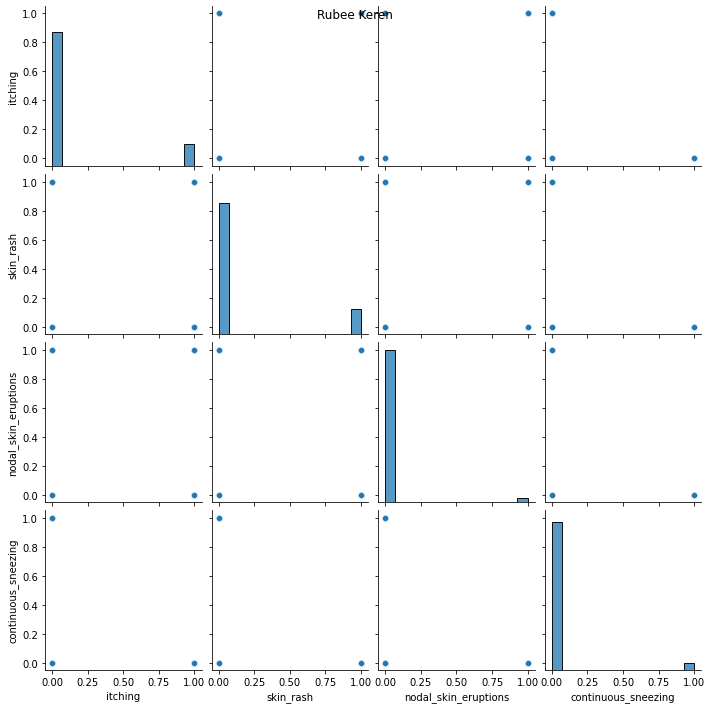

In [ ]:
# visualize pairplot
sample2 = disease[['itching', 'skin_rash','nodal_skin_eruptions', 'continuous_sneezing','prognosis']].copy()
sns.pairplot(data=sample2).fig.suptitle('Rubee Keren')

In [ ]:
# column names
sample=disease.columns
sample=sample[:-1]
disease.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [ ]:
# define y
y=disease['prognosis']

In [ ]:
# define X
X = disease[sample]


In [ ]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

In [ ]:
# verify shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3444, 132), (1476, 132), (3444,), (1476,))

In [ ]:
# select model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =100)

In [ ]:
# train model
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# predict with model
y_pred=model.predict(X_test)

In [ ]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# model accuracy
accuracy_score(y_test,y_pred)

1.0

In [ ]:
# model confusion matrix
confusion_matrix(y_test,y_pred)

array([[31,  0,  0, ...,  0,  0,  0],
       [ 0, 37,  0, ...,  0,  0,  0],
       [ 0,  0, 35, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 39,  0,  0],
       [ 0,  0,  0, ...,  0, 35,  0],
       [ 0,  0,  0, ...,  0,  0, 32]])

In [ ]:
print(classification_report(y_test,y_pred))
# model classification report


                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        31
                                   AIDS       1.00      1.00      1.00        37
                                   Acne       1.00      1.00      1.00        35
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        37
                              Arthritis       1.00      1.00      1.00        46
                       Bronchial Asthma       1.00      1.00      1.00        37
                   Cervical spondylosis       1.00      1.00      1.00        31
                            Chicken pox       1.00      1.00      1.00        29
                    Chronic cholestasis       1.00      1.00      1.00        32
                            Common Cold       1.00      1.00      1.00        39
                           

In [ ]:
# future prediction
model.predict([[1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Fungal infection'], dtype=object)

In [ ]:
# define X_new
sample=sample[:5]
X_new=disease[sample]

In [ ]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y, train_size=0.7, random_state=2529)

In [ ]:
# verify shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3444, 5), (1476, 5), (3444,), (1476,))

In [ ]:
# select model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =100)

In [ ]:
# train model
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# predict with model
y_pred=model.predict(X_test)

In [ ]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# model accuracy
accuracy_score(y_test,y_pred)

0.14634146341463414

In [ ]:
model.predict([[1,1,1,0,0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Fungal infection'], dtype=object)

In [ ]:
model.predict([[1,1,0,0,0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Chicken pox'], dtype=object)